# Initial data exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'
sns.set()
import gc

In [2]:
%%time
df = pd.read_parquet('../data/interim/sample2m.parquet')

CPU times: user 3.64 s, sys: 1.24 s, total: 4.88 s
Wall time: 5.32 s


## Target columns

In [3]:
target_columns = ['TARGET_reply', 'TARGET_retweet','TARGET_retweet_with_comment', 'TARGET_like']

In [4]:
df[target_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2241793 entries, 0 to 2241792
Data columns (total 4 columns):
 #   Column                       Dtype
---  ------                       -----
 0   TARGET_reply                 int64
 1   TARGET_retweet               int64
 2   TARGET_retweet_with_comment  int64
 3   TARGET_like                  int64
dtypes: int64(4)
memory usage: 68.4 MB


Positive and negative interactions are balanced

In [5]:
df[target_columns].sum(axis=1).apply(lambda x: x > 0).value_counts(normalize=True)

False    0.502247
True     0.497753
dtype: float64

The different kinds of positive interactions are really unbalanced

In [6]:
for col in target_columns:
    print(col)
    print(df[col].value_counts(normalize=True)*100)

TARGET_reply
0    97.085815
1     2.914185
Name: TARGET_reply, dtype: float64
TARGET_retweet
0    91.237371
1     8.762629
Name: TARGET_retweet, dtype: float64
TARGET_retweet_with_comment
0    99.303192
1     0.696808
Name: TARGET_retweet_with_comment, dtype: float64
TARGET_like
0    60.261898
1    39.738102
Name: TARGET_like, dtype: float64


## Feature columns

In [7]:
feature_columns = [c for c in df.columns if c not in target_columns]

In [8]:
df[feature_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2241793 entries, 0 to 2241792
Data columns (total 18 columns):
 #   Column                              Dtype         
---  ------                              -----         
 0   hashtags                            object        
 1   present_media                       object        
 2   present_links                       object        
 3   present_domains                     object        
 4   tweet_type                          category      
 5   language                            category      
 6   tweet_timestamp                     datetime64[ns]
 7   engaged_with_user_id                object        
 8   engaged_with_user_follower_count    int64         
 9   engaged_with_user_following_count   int64         
 10  engaged_with_user_is_verified       bool          
 11  engaged_with_user_account_creation  datetime64[ns]
 12  engaging_user_id                    object        
 13  engaging_user_follower_count        int64 

### Hashtags

In [9]:
df['hashtags'].isna().sum() / len(df['hashtags'])

0.7996362732866058

In [10]:
df['hashtags'].dropna().head(15)

2                    [8F4665495616E63F2F6162B1EA48DD26]
10                   [9A67DA1BFE1C6FFA403EC7319DB66431]
27                   [F3B840892B0DE473D98188D82118B684]
50    [E30C12ACEFC56E810A0AF1133CF55C08, BDBB5D07BEE...
52    [181FD54324E007B8816693AB274A7911, A4C4EE3FDED...
54    [62C7B900BE4267748F9E4BD701ADF6D9, 2CB4DFD7CEB...
59                   [875D6EB83473C974E28D4AF926462D32]
60                   [1A411C257390A6489F5F1BB8D621136C]
67                   [22BC64D928F6318263CE2A9499912173]
72    [34A322551CCAF96888FE45A841A89A1B, A140D73A32E...
82                   [5EF90CC4ACACB3D34E91494CBC9759E8]
87                   [3F936A4F43D4D7FFAC9AFCE5F2C7D81A]
89    [43B37225C841C6DB6E7D340EAFBA569C, F41EAA37F8A...
91                   [2054240FD89F917F0F412C4E856CFF54]
97    [F79F9A7524277E42EF495FCB636CB739, 615B3641204...
Name: hashtags, dtype: object

### Present media

In [11]:
df['present_media'].isna().sum() / len(df)

0.618496444586989

In [12]:
df['present_media'].dropna().head(15)

2                          [Photo]
4                          [Photo]
7                          [Photo]
10                         [Photo]
11                         [Photo]
12                         [Photo]
14                         [Photo]
17                           [GIF]
18    [Photo, Photo, Photo, Photo]
25                  [Photo, Photo]
27                         [Photo]
29                         [Photo]
30                         [Photo]
32                         [Photo]
36                         [Video]
Name: present_media, dtype: object

### Present links

In [13]:
df['present_links'].isna().sum() / len(df)

0.8869659241508917

In [14]:
df['present_links'].dropna().head(15)

0      [24F3875A3FEE1DA4B7BCD346EF4A7066]
2      [9A94C6B87BA0A96CF8932FFC18ADDA2E]
16     [ED754FA9F29F8973D3C23C7634F03EFD]
27     [57D5CBD305806D3CB982D899B6916948]
40     [321E64AAF894BA5D1754498D840E3B22]
43     [2BF6D045EFF9B00D6A0F20C3DDAA52D0]
53     [18F99ADED7BB717730C20EB9C1F81888]
56     [33D6DC55521D1D173987BFA3FC531B3A]
76     [51361925D5788CFF9DC460C7B43993C9]
82     [50B534362A7E8151BD03CFE7A2618664]
85     [14062B799BA824A6298F1AB1B99E5D10]
98     [2501E593E05F39E3E2A55BE902A50CC5]
104    [7C2755F94791DA95110D39DD7050A95F]
108    [5A72CA6FA8DAC7452476CD34AA2CDA6B]
115    [C013A6C48A22DD23C59630B4F5589B17]
Name: present_links, dtype: object

### Present domains

In [15]:
df['present_domains'].isna().sum() / len(df)

0.8869659241508917

In [16]:
df['present_domains'].dropna().head(15)

0      [3C0DB64B05242E8A7ED51F93785AA091]
2      [0FF02B2C345DC24DF9453DB993999FFE]
16     [0E8A1428D47DB3C6BC49C7C5E3D00FFD]
27     [B878DFE1B736AFD9F6777AF38F8DE61D]
40     [11C58A0A3C05195C27734DA4B3AAFBDF]
43     [B42A27602DFE6CA4818873830ECE9D8D]
53     [F535EED93F4683E4EC6D577553AD5792]
56     [7171D7E4D7B859B2A4B0D4C5ACB43AC8]
76     [37F6EF8038F7A0B9A07DF964E16EB09A]
82     [9EFF000CDB18B710CDDB43EE1D8C300B]
85     [15D74EBD232AB1C0C642ABCD00F8E4B2]
98     [449D20BE571A3EF32E26268B2FDC2F33]
104    [3B14547CDAEBBA28E31AFCBF8AA87464]
108    [FEBD433199689AB85EEA3A5134DE9B4E]
115    [4FEBD79E0505AA39C211F38237028C88]
Name: present_domains, dtype: object

### Tweet type

We should be seeing 'Reply' too, but nothing appears

In [17]:
df['tweet_type'].head(15)

0        Quote
1     TopLevel
2     TopLevel
3     TopLevel
4      Retweet
5     TopLevel
6     TopLevel
7     TopLevel
8     TopLevel
9     TopLevel
10    TopLevel
11    TopLevel
12     Retweet
13    TopLevel
14    TopLevel
Name: tweet_type, dtype: category
Categories (3, object): ['Quote', 'Retweet', 'TopLevel']

In [18]:
df['tweet_type'].value_counts(normalize=True)

TopLevel    0.591903
Retweet     0.326728
Quote       0.081369
Name: tweet_type, dtype: float64

### Language

In [19]:
df['language'].head()

0    E7F038DE3EAD397AEC9193686C911677
1    488B32D24BD4BB44172EB981C1BCA6FA
2    DA13A5C3763C212D9D68FC69102DE5E5
3    B0FA488F2911701DD8EC5B1EA5E322D8
4    1F73BB863A39DB62B4A55B7E558DB1E8
Name: language, dtype: category
Categories (66, object): ['00304D7356D6C64481190D708D8F739C', '105008E45831ADE8AF1DB888319F422A', '10C6C994C2AD434F9D49D4BE9CFBC613', '159541FA269CA8A9CDB93658CAEC4CA2', ..., '9D831A0F3603A54732CCBDBF291D17B7', '82C9890E4A7FC1F8730A3443C761143E', '5F152815982885A996841493F2757D91', '8C64085F46CD49FA5C80E72A35845185']

<AxesSubplot:>

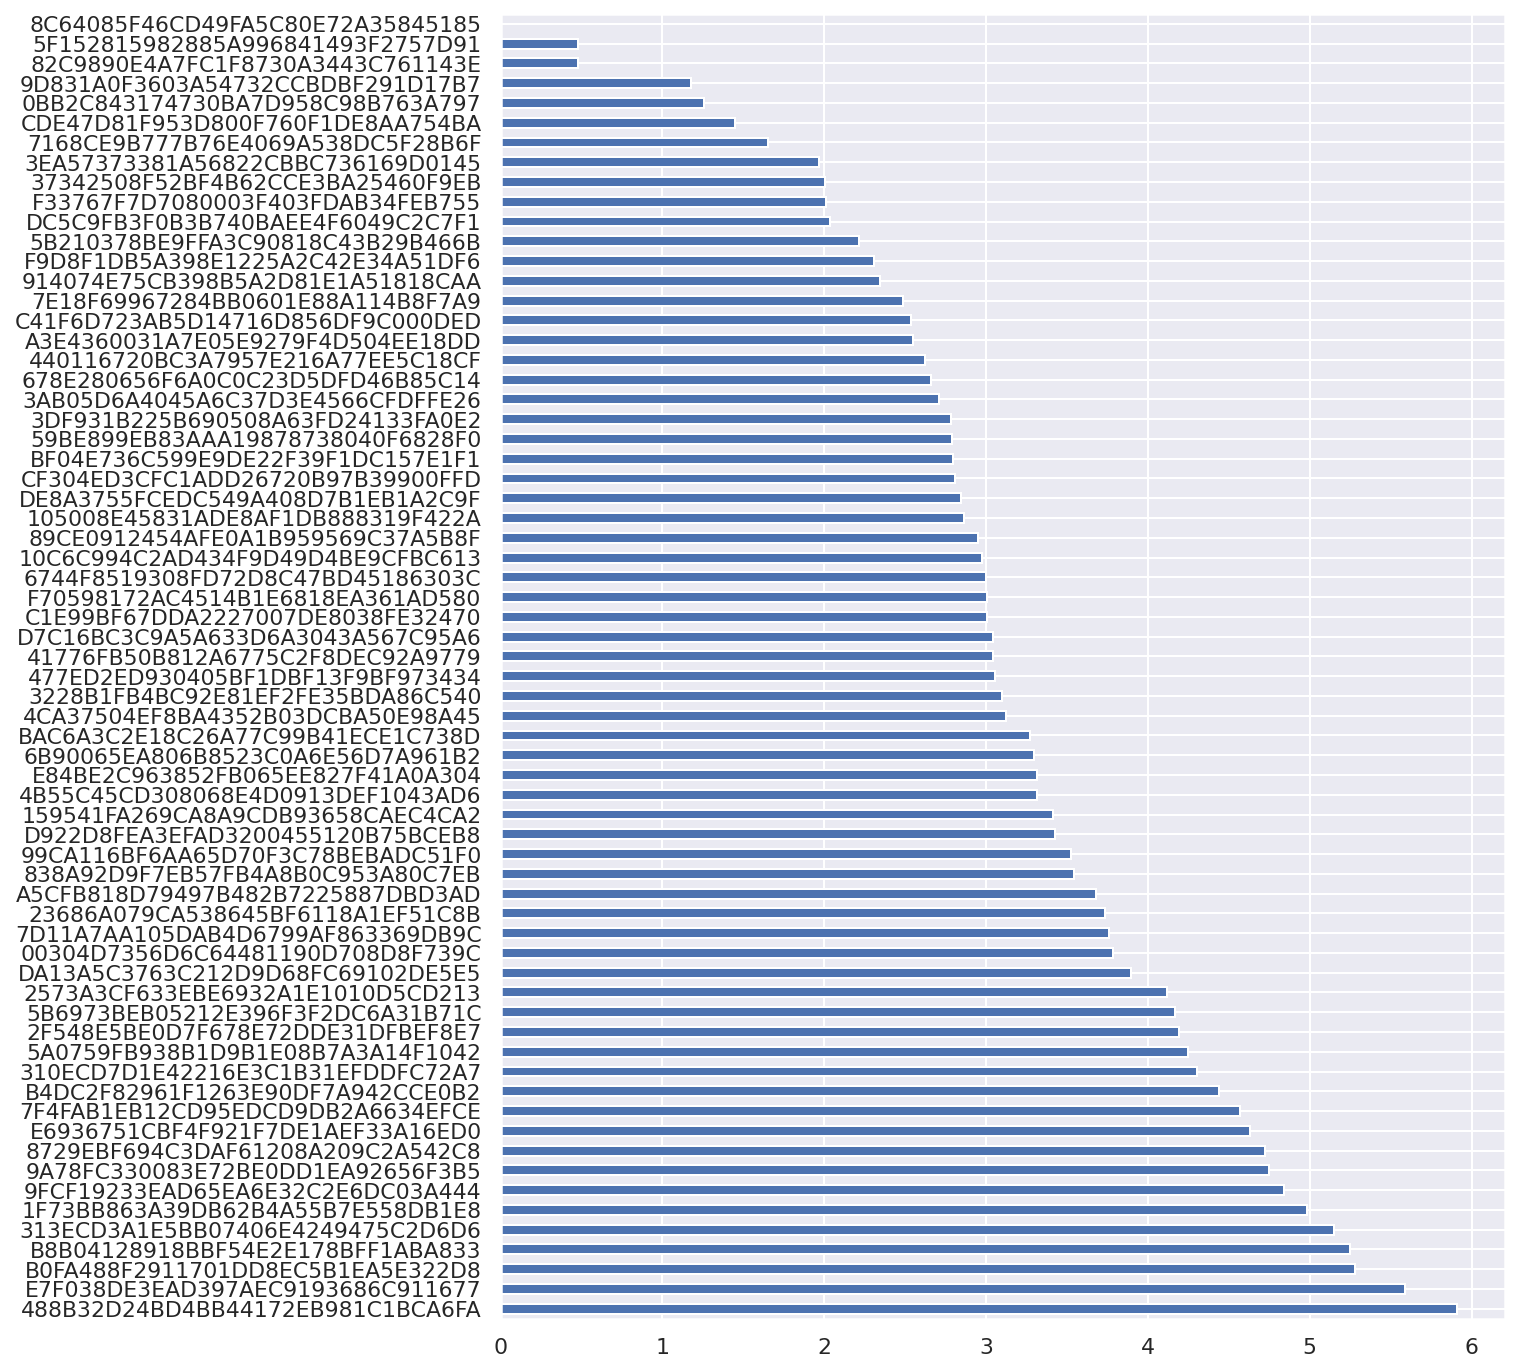

In [20]:
df['language'].value_counts().apply(np.log10).plot.barh(figsize=(9, 12))

### Tweet timestamp

In [21]:
df['tweet_timestamp'].sort_values()

2180681   2021-02-04 00:00:00
1499021   2021-02-04 00:00:00
13440     2021-02-04 00:00:00
1241777   2021-02-04 00:00:00
549539    2021-02-04 00:00:00
                  ...        
265573    2021-02-24 23:59:51
1899700   2021-02-24 23:59:52
2116721   2021-02-24 23:59:54
1110584   2021-02-24 23:59:55
403993    2021-02-24 23:59:56
Name: tweet_timestamp, Length: 2241793, dtype: datetime64[ns]

We have data starting on `February 4 2021 00:00:00` and up to `February 24 2021 23:59:56`. For a total of 21 days or 3 weeks.

<AxesSubplot:ylabel='tweet_timestamp'>

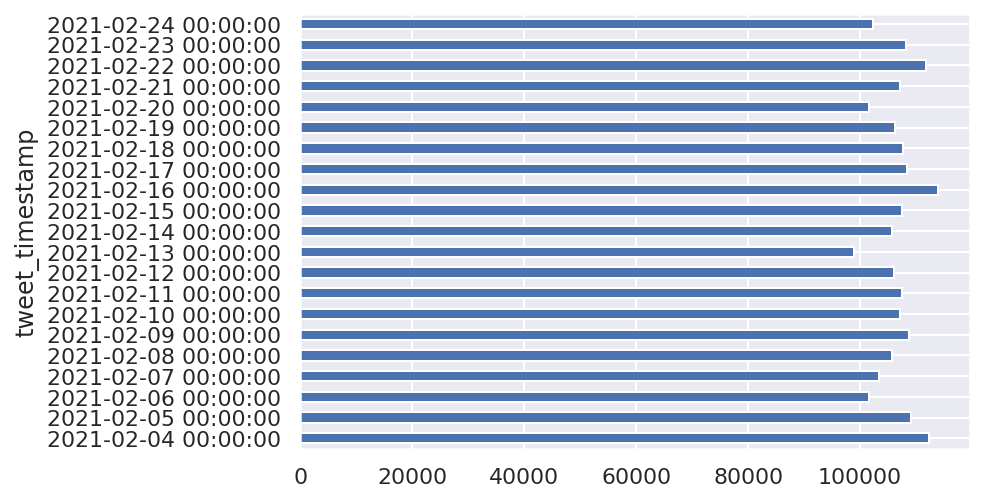

In [22]:
df.groupby(pd.Grouper(key='tweet_timestamp', freq='1d')).size().plot.barh()

---

### Engaged with user id

On average, each user has made two interactions

In [23]:
df['engaged_with_user_id'].isna().sum()

0

In [24]:
len(df['engaged_with_user_id'].unique()) / len(df)

0.5420214979705976

Some users made a lot of tweets

In [25]:
df['engaged_with_user_id'].value_counts()

D956CB05C8566B63F75C86A595A84417    1487
1DE5D18797E212A3850C5FB5C35E12E2    1320
B4246E7A34B52630ED396609E307F784    1271
7938C10B32A2FFFB0A4965A5555F5157    1068
F050BCE6C6A405C11C8D7897017CE1C1     946
                                    ... 
DF4DDE39F3C023CA3DD8BBD0521E3161       1
0ACA6F6ADA88E1382F429065D5956612       1
D2C1523040C2291300D42B7B131FAEDD       1
7B0A9C199A9B5068616B81D9C8EE2F18       1
2914335AE97C6228978D16E5940446EC       1
Name: engaged_with_user_id, Length: 1215100, dtype: int64

Most users have been engaged with only once

In [108]:
df['engaged_with_user_id'].value_counts().describe()

count    1.215100e+06
mean     1.844945e+00
std      7.289015e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.487000e+03
Name: engaged_with_user_id, dtype: float64

<AxesSubplot:>

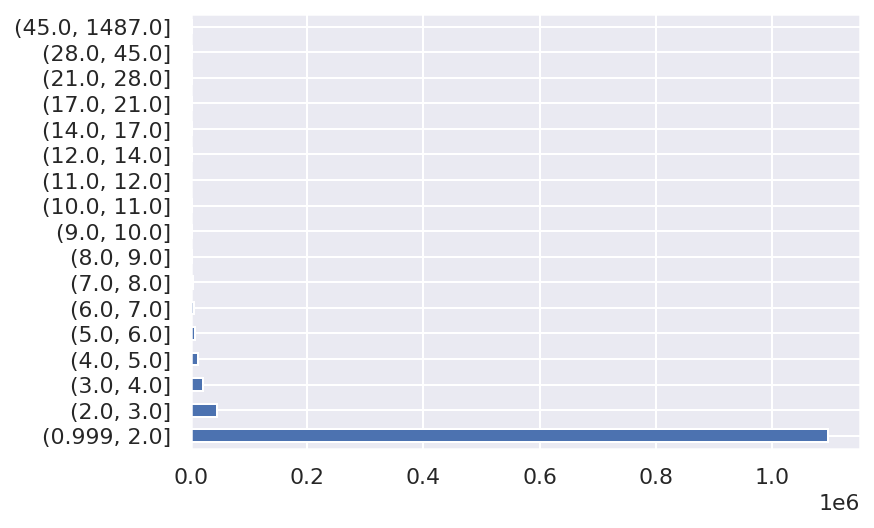

In [106]:
pd.qcut(df['engaged_with_user_id'].value_counts().values, q=500, duplicates='drop').value_counts().plot.barh()

### Engaged with user follower count

<AxesSubplot:>

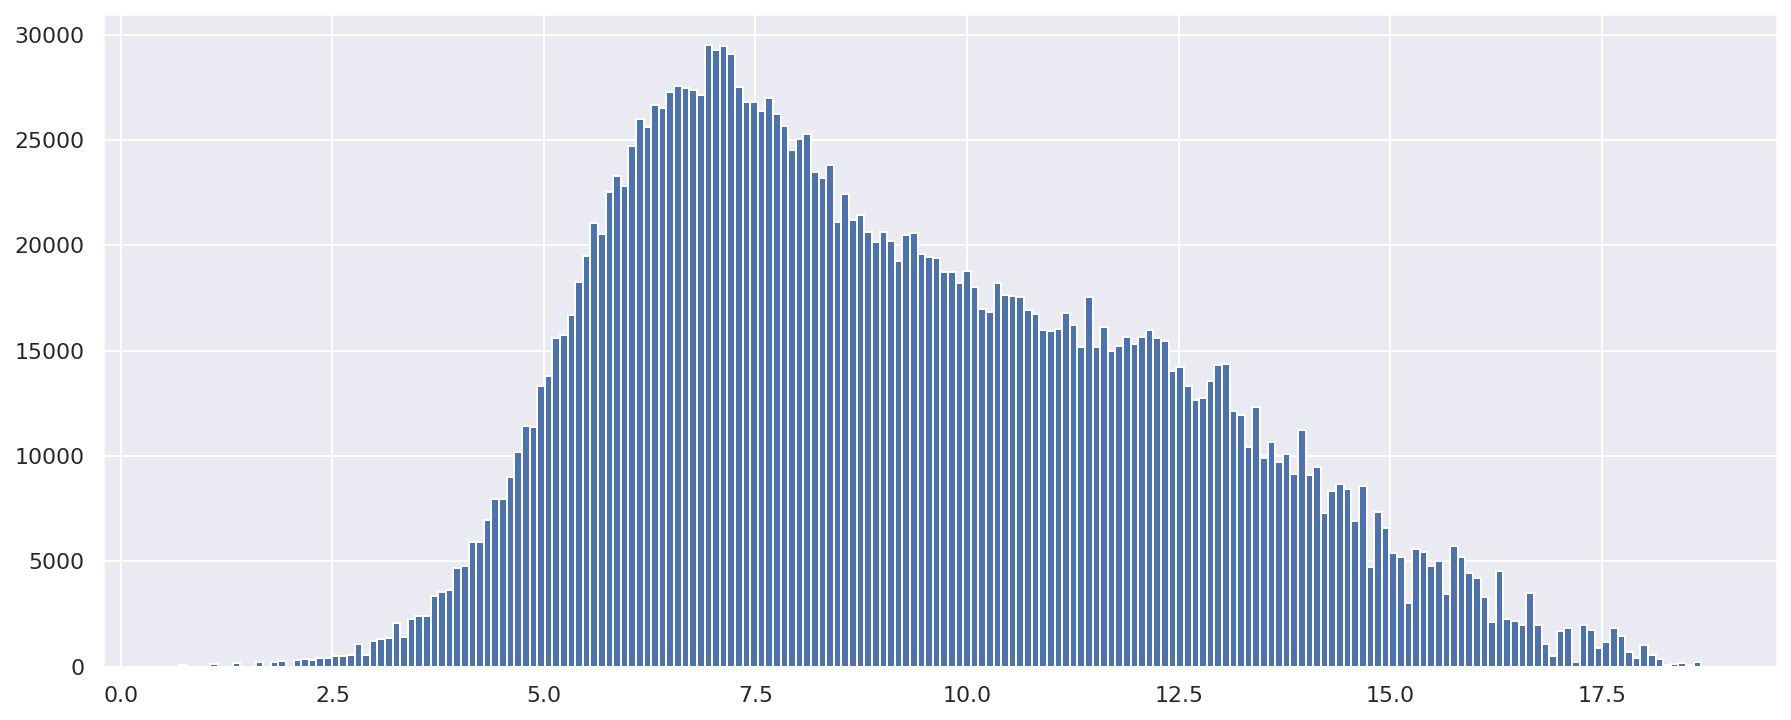

In [59]:
df['engaged_with_user_follower_count'].apply(np.log1p).hist(bins=200, figsize=(15, 6))

### Engaged with user following count

<AxesSubplot:>

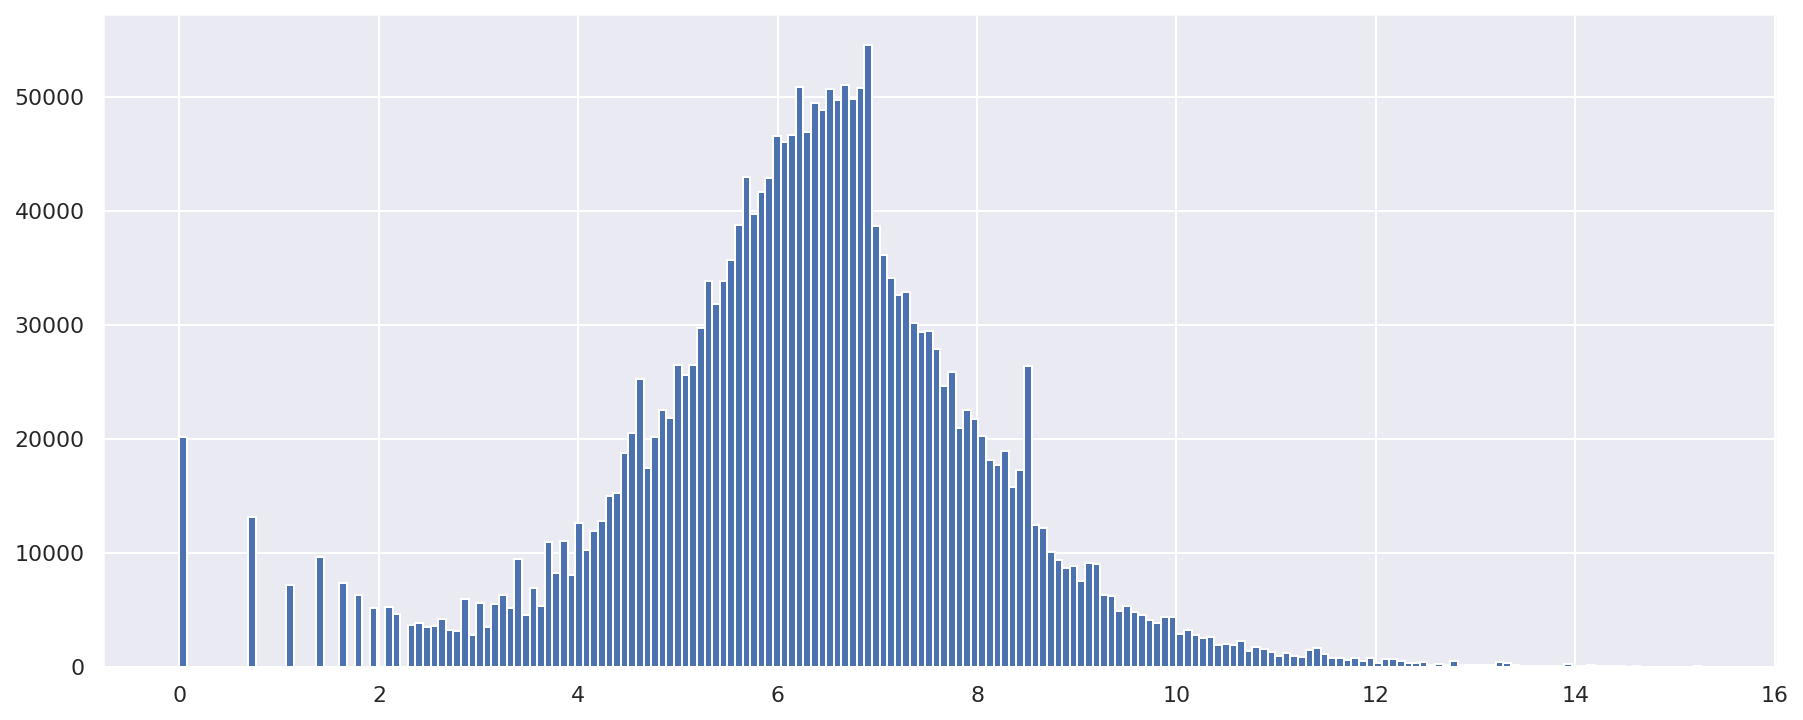

In [58]:
df['engaged_with_user_following_count'].apply(np.log1p).hist(bins=200, figsize=(15, 6))

### Engaged with user is verified

In [62]:
df['engaged_with_user_is_verified'].value_counts(normalize=True)

False    0.811101
True     0.188899
Name: engaged_with_user_is_verified, dtype: float64

### Engaged with user account creation

<AxesSubplot:ylabel='engaged_with_user_account_creation'>

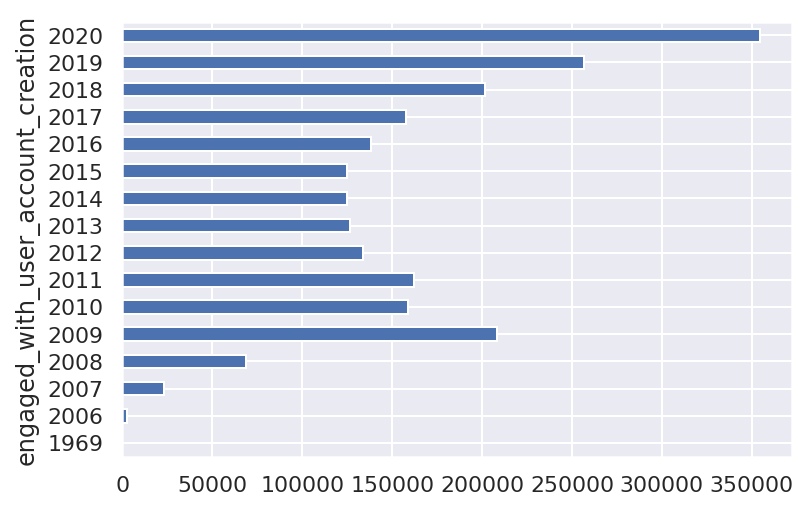

In [77]:
df['engaged_with_user_account_creation'].groupby(df['engaged_with_user_account_creation'].dt.year).count().plot.barh()

---

### Engaging user id

In [79]:
df['engaging_user_id'].isna().sum()

0

In [81]:
len(df['engaging_user_id'].unique()) / len(df)

0.756407036688936

In [84]:
df['engaging_user_id'].value_counts()

DA0026BDA7CA28C0DB8A89BC0C783F55    63
5D2767D7F1A11ABD109F44DE5A7CF592    55
BA934E5E5C27F9D6E2D565DDB43F4800    45
E341CD1B155557B9DDE8A0879542BE3F    40
CE1FECA5A0D58FFD7B001EA7D122F67A    39
                                    ..
E50C194D0C5B63266F7358D580E59D1D     1
852B4ABD9FBD130FCEB067B09B38B597     1
656FE54C872C2B1F5283A8BA1766D927     1
6796140A45D18ED6B52F1E15D96A33CF     1
601F3B3F4300BDF208D5F47AE4D489F4     1
Name: engaging_user_id, Length: 1695708, dtype: int64

<AxesSubplot:>

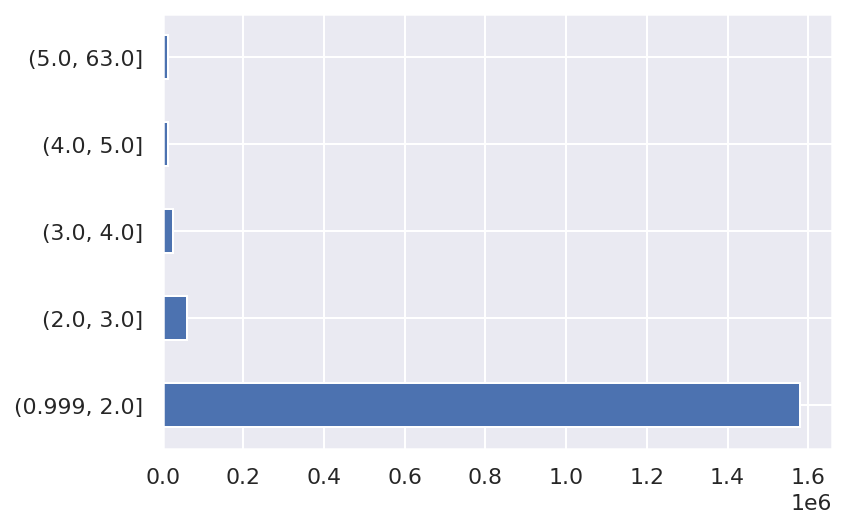

In [83]:
pd.qcut(df['engaging_user_id'].value_counts().values, q=100, duplicates='drop').value_counts().plot.barh()

### Engaging user follower count

<AxesSubplot:>

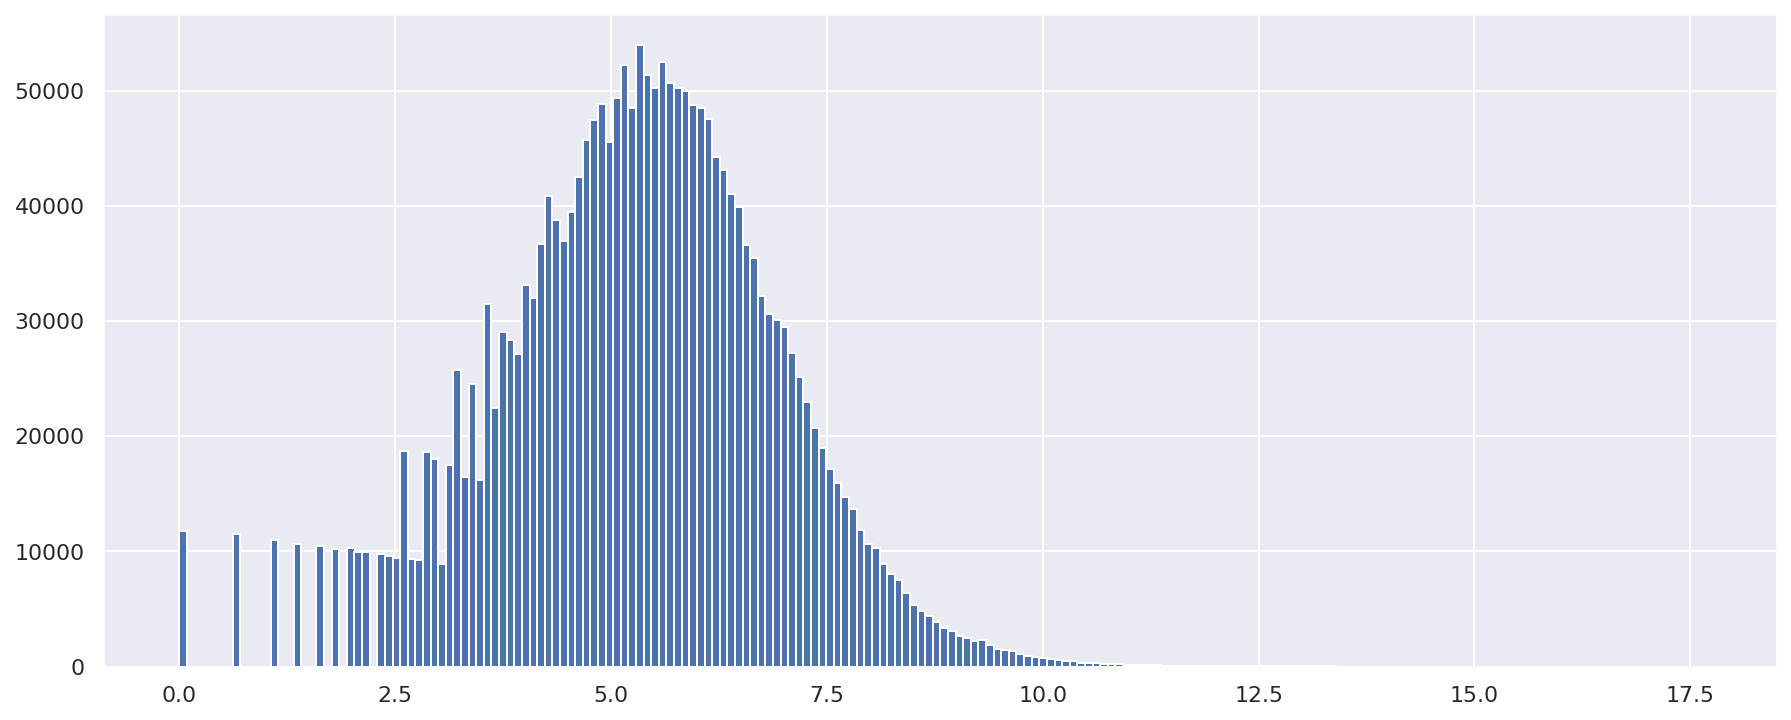

In [85]:
df['engaging_user_follower_count'].apply(np.log1p).hist(bins=200, figsize=(15, 6))

### Engaging user following count

<AxesSubplot:>

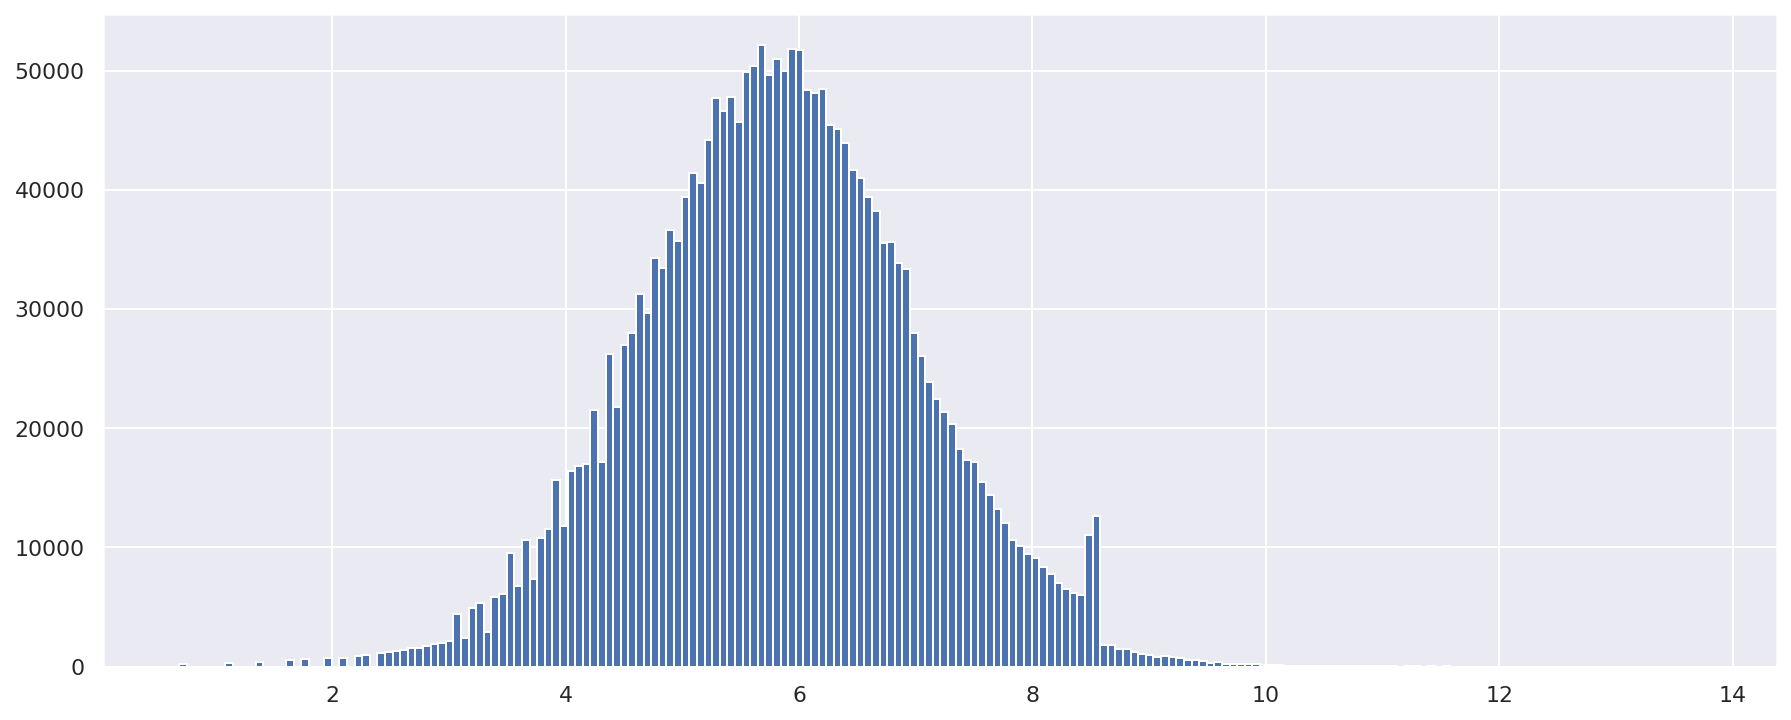

In [86]:
df['engaging_user_following_count'].apply(np.log1p).hist(bins=200, figsize=(15, 6))

### Engaging user is verified

In [87]:
df['engaging_user_is_verified'].value_counts(normalize=True)

False    0.998296
True     0.001704
Name: engaging_user_is_verified, dtype: float64

### Engaging user account creation

<AxesSubplot:ylabel='engaging_user_account_creation'>

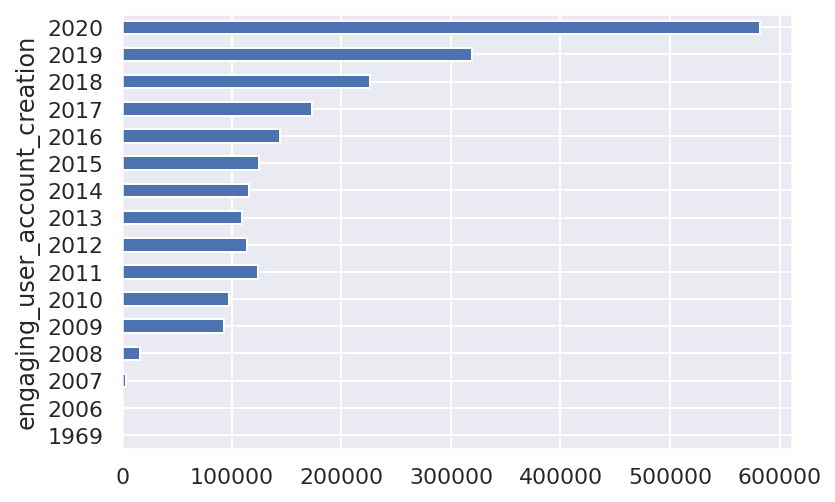

In [89]:
df['engaging_user_account_creation'].groupby(df['engaging_user_account_creation'].dt.year).count().plot.barh()

---

### Engagee follows engager

In [109]:
df['engagee_follows_engager'].isna().sum()

0

In [93]:
df['engagee_follows_engager'].value_counts(normalize=True)

False    0.578317
True     0.421683
Name: engagee_follows_engager, dtype: float64